In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
print(df.shape,"\n")
df.info()
df.head() 

(404290, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


is_duplicate
0    255027
1    149263
Name: count, dtype: int64 



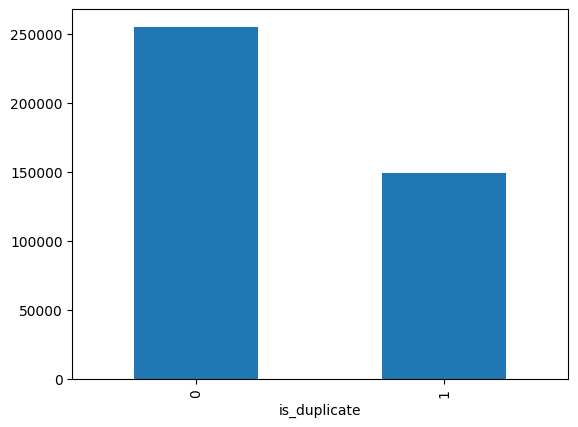

In [3]:
# Number of duplicate and non-duplicate columns

print(df['is_duplicate'].value_counts(),"\n")
df['is_duplicate'].value_counts().plot(kind='bar')
plt.show()

Number of unique questions: 537933 
Number of Repeated questions: 111780


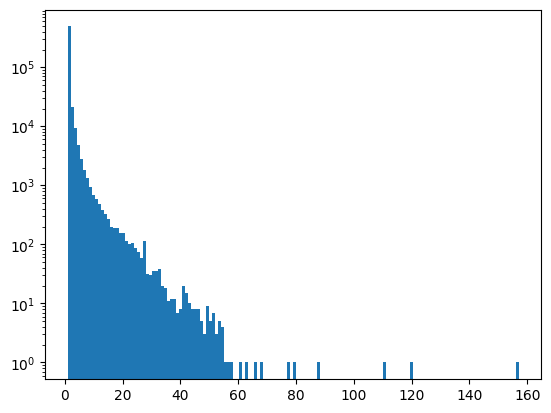

In [4]:
# Repeated questions

unique_id=pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
repeated_id=unique_id.value_counts()>1
print(f"Number of unique questions: {np.unique(unique_id).shape[0]} \nNumber of Repeated questions: {repeated_id[repeated_id].shape[0]}")

# Plotting them

plt.hist(unique_id.value_counts().values,bins=150)
plt.yscale('log')
plt.show()

In [5]:
new_df=df.sample(30000, random_state=10)
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
print(new_df.duplicated().sum(),"\n")

ques_df=new_df[['question1','question2']]
ques_df.head()

0 



,question1,question2
108281,How can I get more information on cryptocurrency?,What can you say about kerala Congress's exit?
365075,How much does each miner in Gold Rush: Alaska ...,What kind of dog does the Hoffman crew have wi...
399424,Can a stock exchange be listed in another stoc...,What is stock exchange and its functions?
116651,What is the top speed of the quickest football...,Who are your top 5 best foreign football playe...
251097,Is there any way of knowing if a guy is gay?,What are some subtle ways to tell if a guy is ...


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# merge texts

questions=list(ques_df['question1']) + (list(ques_df['question2']))
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr =np.vsplit(cv.fit_transform(questions).toarray(),2)

In [8]:
temp_df1=pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr, index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [9]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [10]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
108281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116651,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
251097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24000, 6000), (6000, 6000), (24000,), (6000,))

 BASE LEARNING MODELS

In [14]:
# Random forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.733

In [15]:
# XGBoost Classifier

from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7168333333333333

In [16]:
# LightGBM Classifier

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)
accuracy_score(y_test,y_pred)

[LightGBM] [Info] Number of positive: 8726, number of negative: 15274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.288434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7132
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 2650
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363583 -> initscore=-0.559845
[LightGBM] [Info] Start training from score -0.559845


0.7218333333333333

 Feature Engineering

In [17]:
#Calculating the length of words 

new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
108281,108281,177958,177959,How can I get more information on cryptocurrency?,What can you say about kerala Congress's exit?,0,49,46
365075,365075,165259,495170,How much does each miner in Gold Rush: Alaska ...,What kind of dog does the Hoffman crew have wi...,0,98,79
399424,399424,110838,408590,Can a stock exchange be listed in another stoc...,What is stock exchange and its functions?,0,57,41
116651,116651,189968,189969,What is the top speed of the quickest football...,Who are your top 5 best foreign football playe...,0,55,89
251097,251097,6403,53276,Is there any way of knowing if a guy is gay?,What are some subtle ways to tell if a guy is ...,1,44,50


In [18]:
# Calculating the number of words

new_df['q1_num_of_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_of_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words
108281,108281,177958,177959,How can I get more information on cryptocurrency?,What can you say about kerala Congress's exit?,0,49,46,8,8
365075,365075,165259,495170,How much does each miner in Gold Rush: Alaska ...,What kind of dog does the Hoffman crew have wi...,0,98,79,19,17
399424,399424,110838,408590,Can a stock exchange be listed in another stoc...,What is stock exchange and its functions?,0,57,41,10,7
116651,116651,189968,189969,What is the top speed of the quickest football...,Who are your top 5 best foreign football playe...,0,55,89,10,16
251097,251097,6403,53276,Is there any way of knowing if a guy is gay?,What are some subtle ways to tell if a guy is ...,1,44,50,11,12


In [19]:
# Calculating the common words

def common_words(row):
    w1=set(map(lambda word: word.lower().strip() , row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip() , row['question2'].split(" ")))
    return len(w1 & w2)

new_df['word_common'] = new_df.apply(common_words ,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,word_common
108281,108281,177958,177959,How can I get more information on cryptocurrency?,What can you say about kerala Congress's exit?,0,49,46,8,8,1
365075,365075,165259,495170,How much does each miner in Gold Rush: Alaska ...,What kind of dog does the Hoffman crew have wi...,0,98,79,19,17,2
399424,399424,110838,408590,Can a stock exchange be listed in another stoc...,What is stock exchange and its functions?,0,57,41,10,7,2
116651,116651,189968,189969,What is the top speed of the quickest football...,Who are your top 5 best foreign football playe...,0,55,89,10,16,3
251097,251097,6403,53276,Is there any way of knowing if a guy is gay?,What are some subtle ways to tell if a guy is ...,1,44,50,11,12,5


In [20]:
# Calculating Total words

def total_words(row):
    w1=set(map(lambda word: word.lower().strip() , row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip() , row['question2'].split(" ")))
    return (len(w1) + len(w2))

new_df['word_total'] = new_df.apply(total_words ,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,word_common,word_total
108281,108281,177958,177959,How can I get more information on cryptocurrency?,What can you say about kerala Congress's exit?,0,49,46,8,8,1,16
365075,365075,165259,495170,How much does each miner in Gold Rush: Alaska ...,What kind of dog does the Hoffman crew have wi...,0,98,79,19,17,2,32
399424,399424,110838,408590,Can a stock exchange be listed in another stoc...,What is stock exchange and its functions?,0,57,41,10,7,2,16
116651,116651,189968,189969,What is the top speed of the quickest football...,Who are your top 5 best foreign football playe...,0,55,89,10,16,3,25
251097,251097,6403,53276,Is there any way of knowing if a guy is gay?,What are some subtle ways to tell if a guy is ...,1,44,50,11,12,5,22


In [21]:
#  Calculating the sharing words

new_df['words_share']=round(new_df['word_common']/new_df['word_total'],3)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,word_common,word_total,words_share
108281,108281,177958,177959,How can I get more information on cryptocurrency?,What can you say about kerala Congress's exit?,0,49,46,8,8,1,16,0.062
365075,365075,165259,495170,How much does each miner in Gold Rush: Alaska ...,What kind of dog does the Hoffman crew have wi...,0,98,79,19,17,2,32,0.062
399424,399424,110838,408590,Can a stock exchange be listed in another stoc...,What is stock exchange and its functions?,0,57,41,10,7,2,16,0.125
116651,116651,189968,189969,What is the top speed of the quickest football...,Who are your top 5 best foreign football playe...,0,55,89,10,16,3,25,0.120
251097,251097,6403,53276,Is there any way of knowing if a guy is gay?,What are some subtle ways to tell if a guy is ...,1,44,50,11,12,5,22,0.227


Exploratory Data Analysis

Question 1 maximum characters 391
Question 1 minimum characters 1
Question 1 Average number of characters 59
Question 2 maximum characters 1151
Question 2 minimum characters 2
Question 2 Average number of characters 60


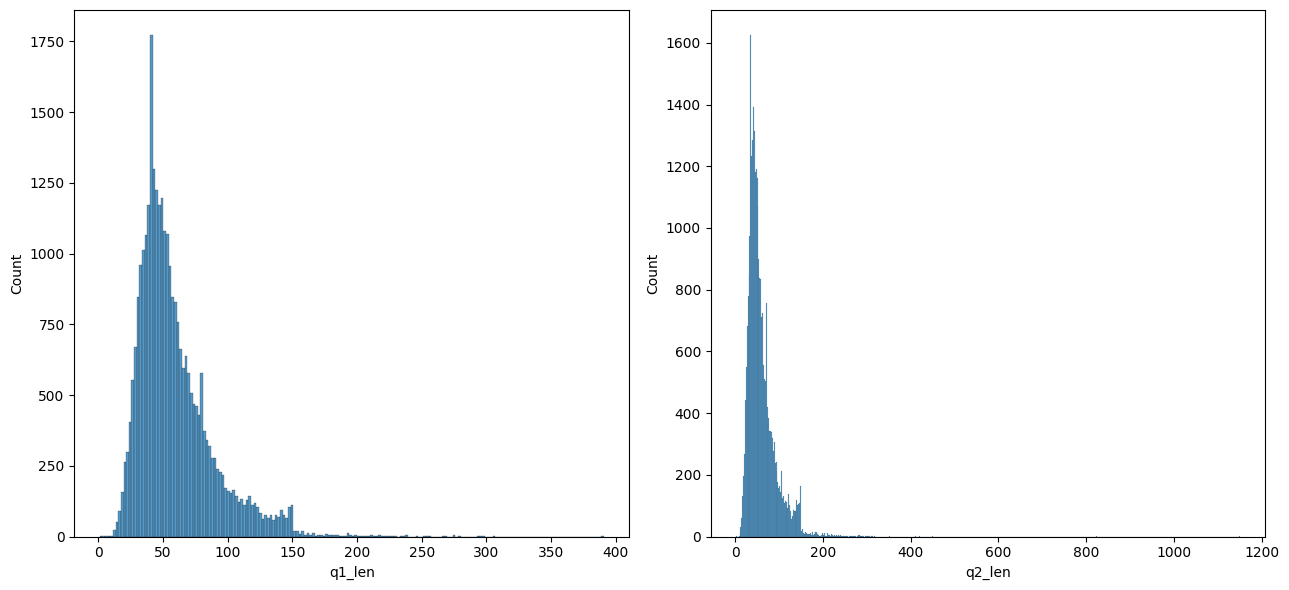

In [22]:
# Analysis of Length Feature

fig, axes = plt.subplots(1, 2, figsize=(13, 6))

sns.histplot(new_df['q1_len'], ax=axes[0])

print("Question 1 maximum characters", new_df['q1_len'].max())
print("Question 1 minimum characters", new_df['q1_len'].min())
print("Question 1 Average number of characters", int(new_df['q1_len'].mean()))

sns.histplot(new_df['q2_len'], ax=axes[1])

print("Question 2 maximum characters", new_df['q2_len'].max())
print("Question 2 minimum characters", new_df['q2_len'].min())
print("Question 2 Average number of characters", int(new_df['q2_len'].mean()))

plt.tight_layout()
plt.show()

Question 1 maximum characters 72
Question 1 minimum characters 1
Question 1 Average number of characters 10
Question 2 maximum characters 237
Question 2 minimum characters 1
Question 2 Average number of characters 11


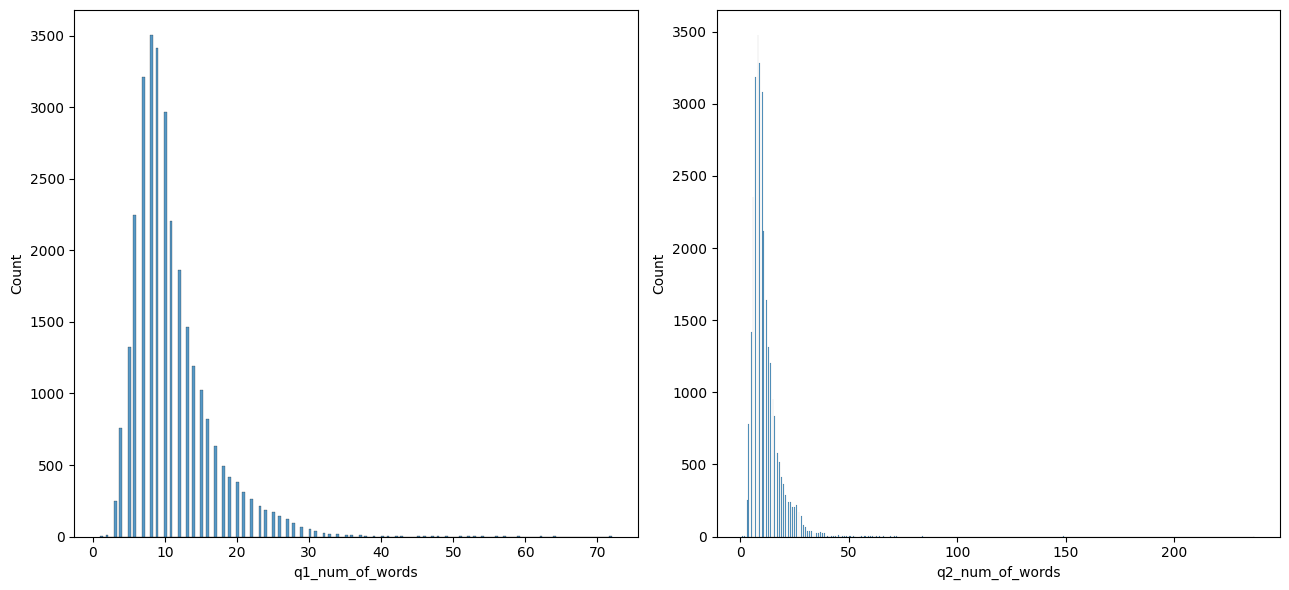

In [23]:
# Analysis of Number of words Feature

fig, axes = plt.subplots(1, 2, figsize=(13, 6))

sns.histplot(new_df['q1_num_of_words'], ax=axes[0])

print("Question 1 maximum characters", new_df['q1_num_of_words'].max())
print("Question 1 minimum characters", new_df['q1_num_of_words'].min())
print("Question 1 Average number of characters", int(new_df['q1_num_of_words'].mean()))

sns.histplot(new_df['q2_num_of_words'], ax=axes[1])

print("Question 2 maximum characters", new_df['q2_num_of_words'].max())
print("Question 2 minimum characters", new_df['q2_num_of_words'].min())
print("Question 2 Average number of characters", int(new_df['q2_num_of_words'].mean()))

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13592\2384018935.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='Non_duplicate')
C:\Users\hp\AppData\Local\Temp\ipykernel_13592\2384018935.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_

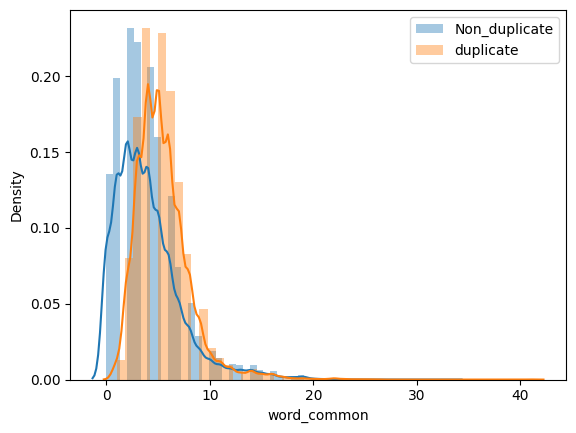

In [24]:
# Analysis of Common_words feature

sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='Non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13592\1216735971.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='Non_duplicate')
C:\Users\hp\AppData\Local\Temp\ipykernel_13592\1216735971.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_d

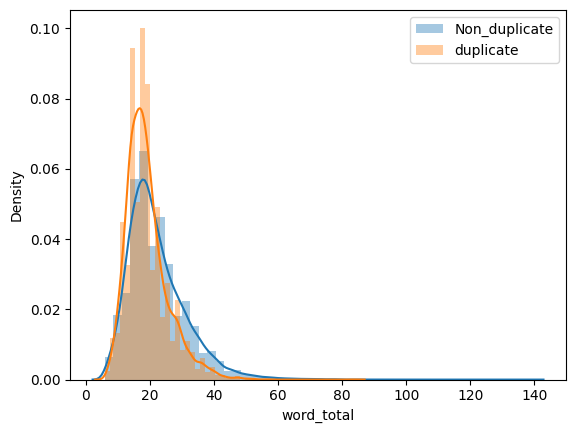

In [25]:
# Analysis of Total_words feature

sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='Non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13592\2965107597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['words_share'],label='Non_duplicate')
C:\Users\hp\AppData\Local\Temp\ipykernel_13592\2965107597.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_

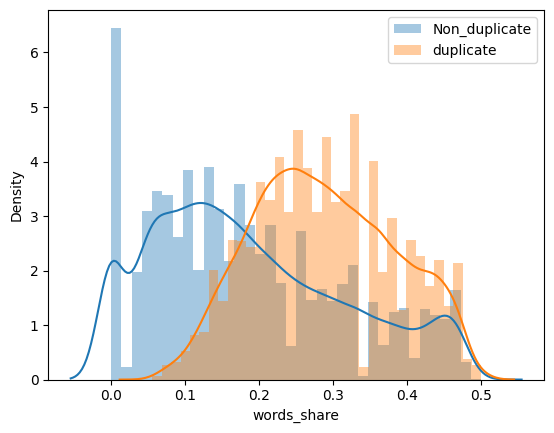

In [26]:
# Analysis of Total_words feature

sns.distplot(new_df[new_df['is_duplicate']==0]['words_share'],label='Non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['words_share'],label='duplicate')
plt.legend()
plt.show()

In [27]:
ques_df=new_df[['question1','question2']]
ques_df.head(2)

,question1,question2
108281,How can I get more information on cryptocurrency?,What can you say about kerala Congress's exit?
365075,How much does each miner in Gold Rush: Alaska ...,What kind of dog does the Hoffman crew have wi...


In [28]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape,"\n")
final_df.head(3)

(30000, 8) 



,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,word_common,word_total,words_share
108281,0,49,46,8,8,1,16,0.062
365075,0,98,79,19,17,2,32,0.062
399424,0,57,41,10,7,2,16,0.125


In [29]:
# save the datasets

ques_df.to_pickle("Questions_dataset.pkl")
final_df.to_pickle("Featured_dataset.pkl")